In [17]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import torch
import numpy as np

foldername = "trained-unidirectional"
epoch = 20
dirs = Path.cwd() / foldername / f"Epoch {epoch}"
plt.rcParams["figure.autolayout"] = True

In [18]:
loss = torch.nn.BCELoss()
data = {"train": None, "test": None}

for i in list(dirs.glob("*-preds.csv")):
    info = i.name.replace("-preds.csv", "")
    df = pd.read_csv(i)
    df["loss"] = [
        loss(torch.tensor(j, dtype = float), 
             torch.tensor(i, dtype = float)).tolist() \
            for i, j in zip(df["actual"].values, df["preds"].values)
    ]
    data[info] = df

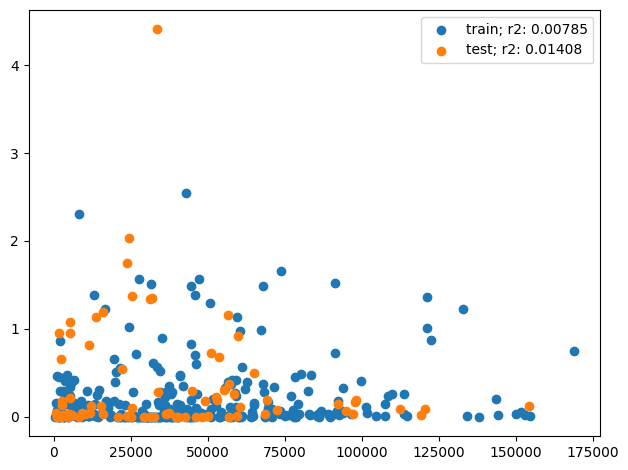

In [19]:
for key in data.keys():
    r2 = np.corrcoef(data[key]["tcr-count"], data[key]["loss"])[0, 1] ** 2
    plt.scatter(data[key]["tcr-count"], data[key]["loss"], label = f"{key}; r2: {r2:.5f}")
plt.legend()
plt.show()

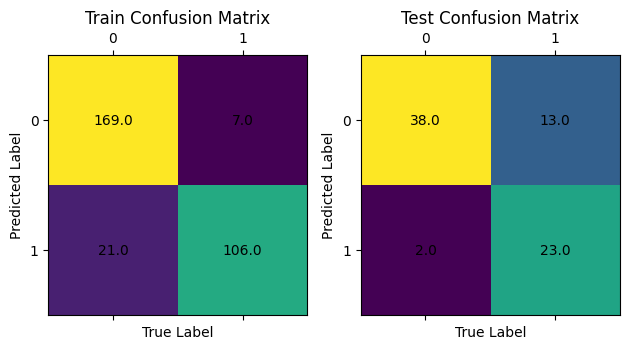

In [20]:
fig, axs = plt.subplots(ncols = 2)

for i, key in enumerate(list(data.keys())):
    conf = np.zeros((2, 2))
    df_ = data[key].copy()
    df_["preds"] = df_["preds"].map(lambda x: 1 if x >= 0.5 else 0)
    conf[0, 0] = ((df_["preds"] == 0) & (df_["actual"] == 0)).sum()
    conf[0, 1] = ((df_["preds"] == 0) & (df_["actual"] == 1)).sum()
    conf[1, 0] = ((df_["preds"] == 1) & (df_["actual"] == 0)).sum()
    conf[1, 1] = ((df_["preds"] == 1) & (df_["actual"] == 1)).sum()
    axs[i].matshow(conf)

    for x in range(2):
        for y in range(2):
            axs[i].text(x, y, str(conf[y, x]), va = "center", ha = "center")
    
    axs[i].set_xlabel("True Label")
    axs[i].set_ylabel("Predicted Label")
    axs[i].set_title(f"{key.title()} Confusion Matrix")